 number of ensemble members with surviving forests = 62


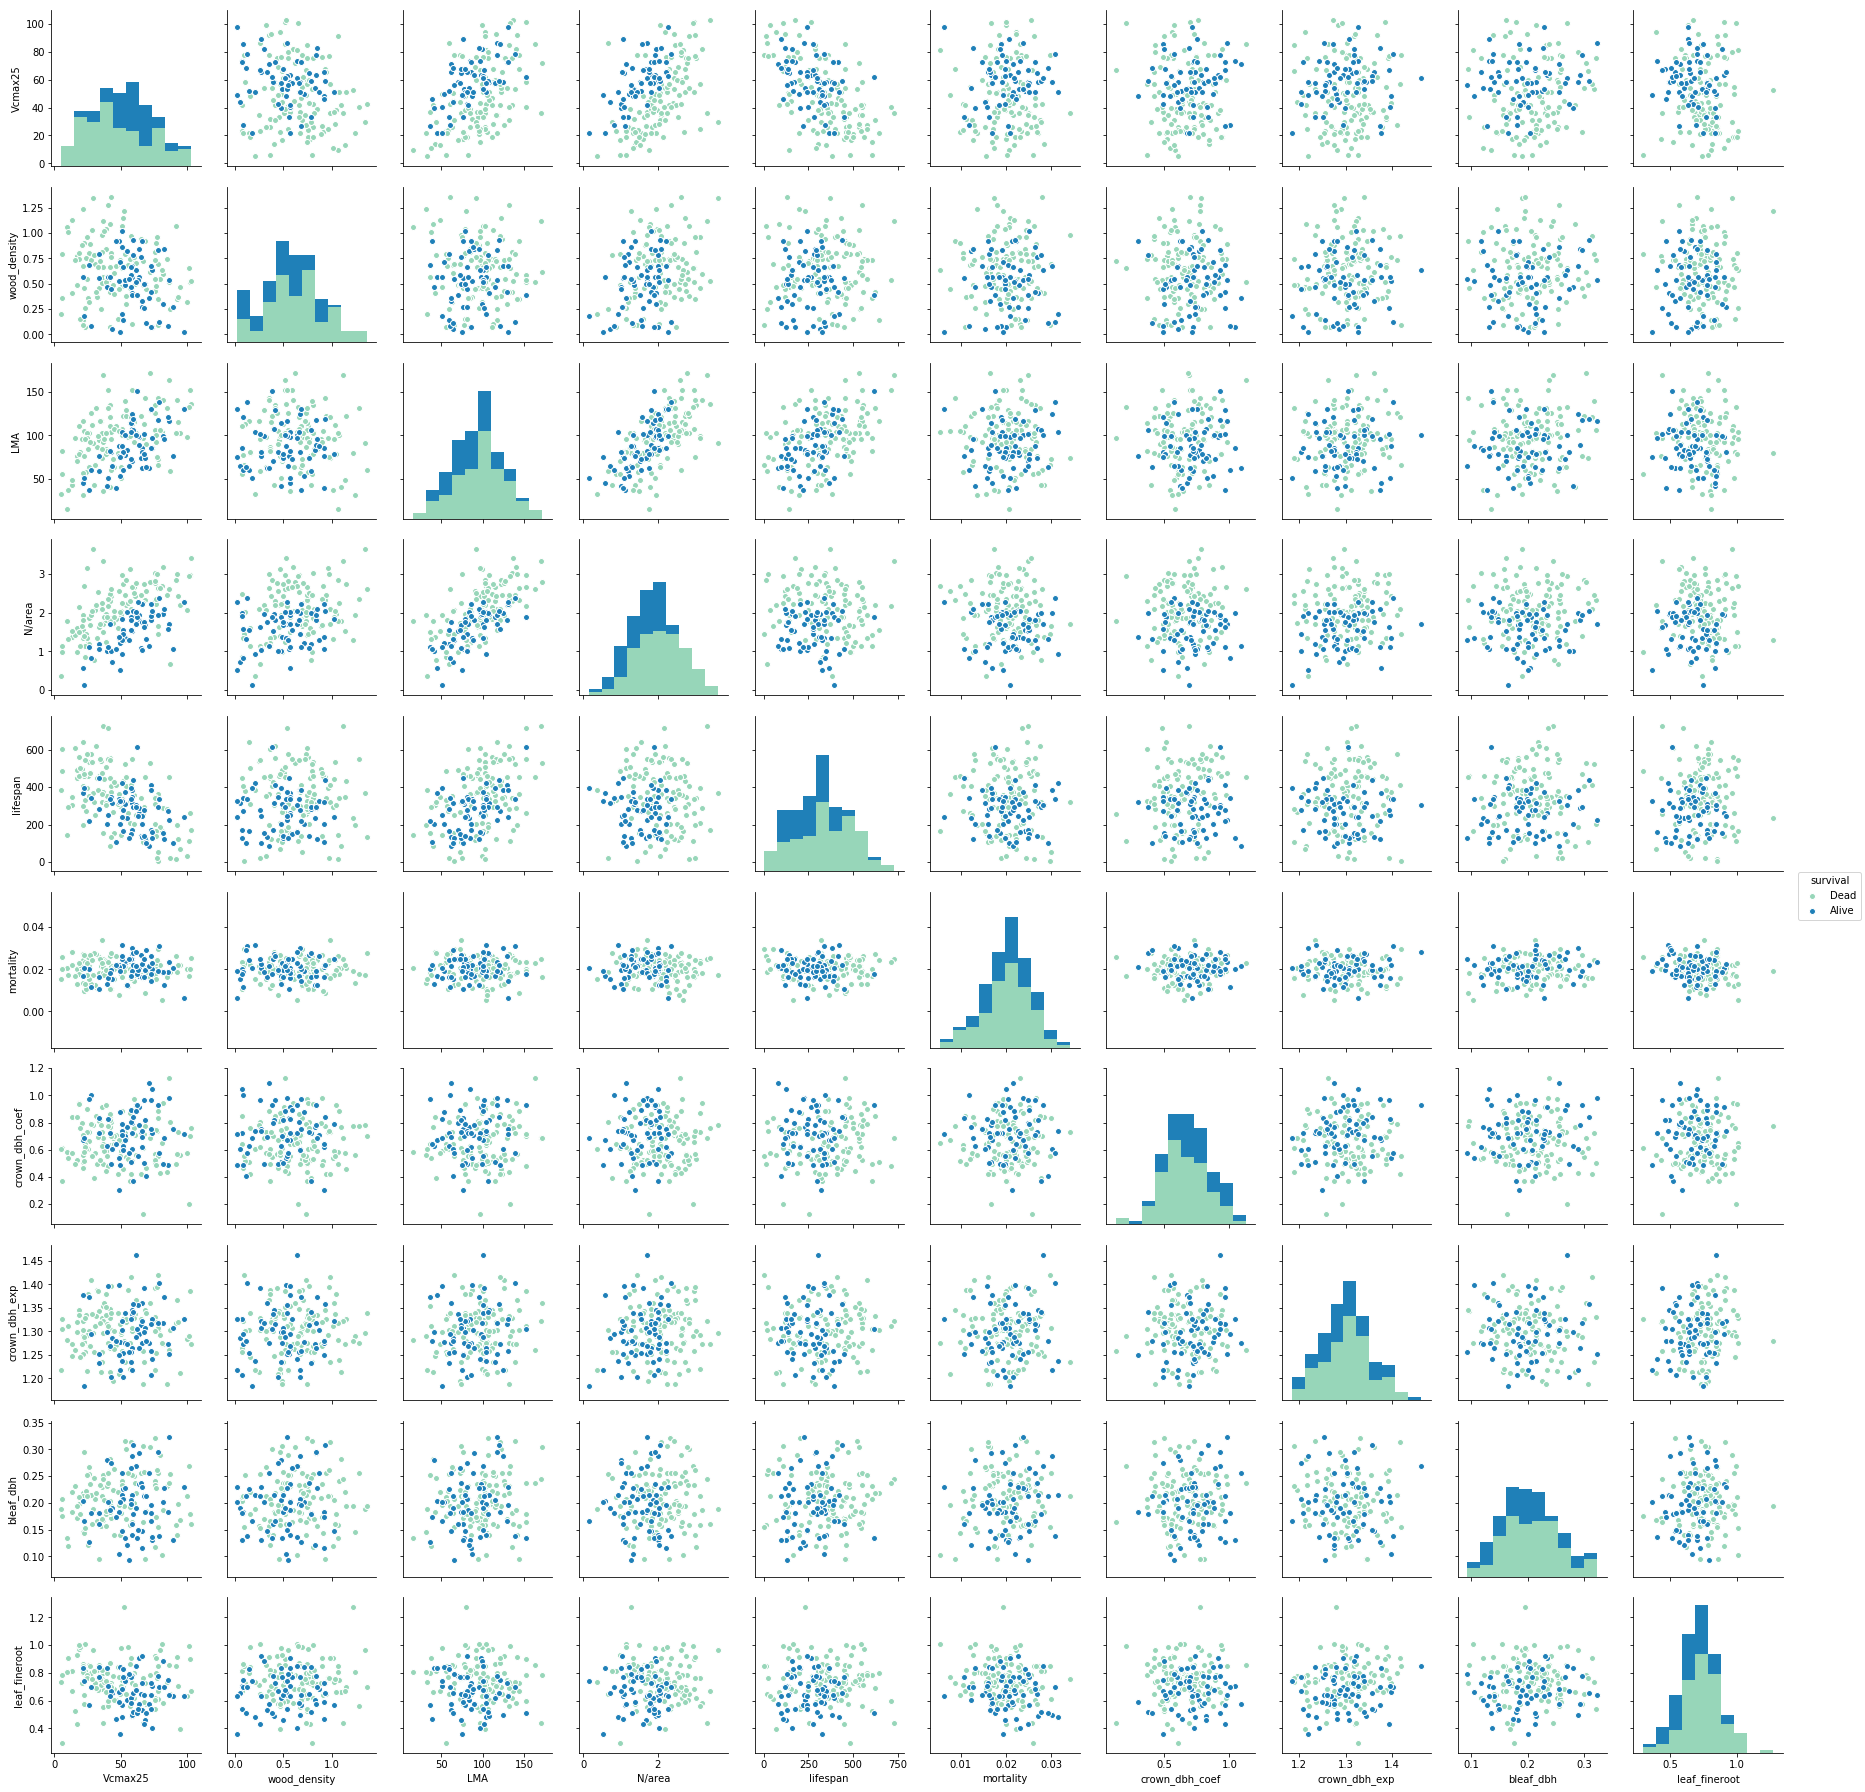

In [4]:
import netCDF4 as nc4
import numpy as np
import pandas as pd
import seaborn as sns


filename_history = '/Users/cdkoven/datasets/fates_output/bci_testbed/fates_clm5_fullmodel_bci_parameter_ensemble_1pft_v001_92c325a_819609f.ensemble.sofar_deflate.nc'
filename_params = '/Users/cdkoven/datasets/fates_output/bci_testbed/fates_params_c6ff126_bcitraits_test01_firstensemble_0179_c180523.nc'

histfile = nc4.Dataset(filename_history)
paramfile = nc4.Dataset(filename_params)
#print(histfile.variables)
biomass_var = histfile.variables['ED_biomass']
#print(biomass_var.shape)

nens = biomass_var.shape[0]
nts = biomass_var.shape[1]
nyears = nts/12

survival_threshold = 100.
survived = biomass_var[:,nts-1,0] > survival_threshold
print(' number of ensemble members with surviving forests = '+str(survived.sum()))


traits_matrix = np.loadtxt('traits_matrix_used_in_param_files.txt')
column_names = ['Vcmax25', 'wood_density', 'LMA', 'N/area','lifespan','mortality','crown_dbh_coef','crown_dbh_exp','bleaf_dbh','leaf_fineroot']

df_traits = pd.DataFrame(traits_matrix, columns=column_names)

#colors = 1. + 10. * survived
#pd.plotting.scatter_matrix(df_traits, alpha=0.7, figsize=(30,30), diagonal='hist', c=colors, s=80)

df_traits["survival"] = pd.cut(survived, bins=[-1,0.5,2.], labels=['Dead','Alive'])

g = sns.pairplot(df_traits, hue="survival",
                 hue_order=df_traits.survival.cat.categories,
                 palette="YlGnBu")


/Users/cdkoven/miniconda2/lib/python2.7/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/Users/cdkoven/miniconda2/lib/python2.7/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/Users/cdkoven/miniconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/cdkoven/miniconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


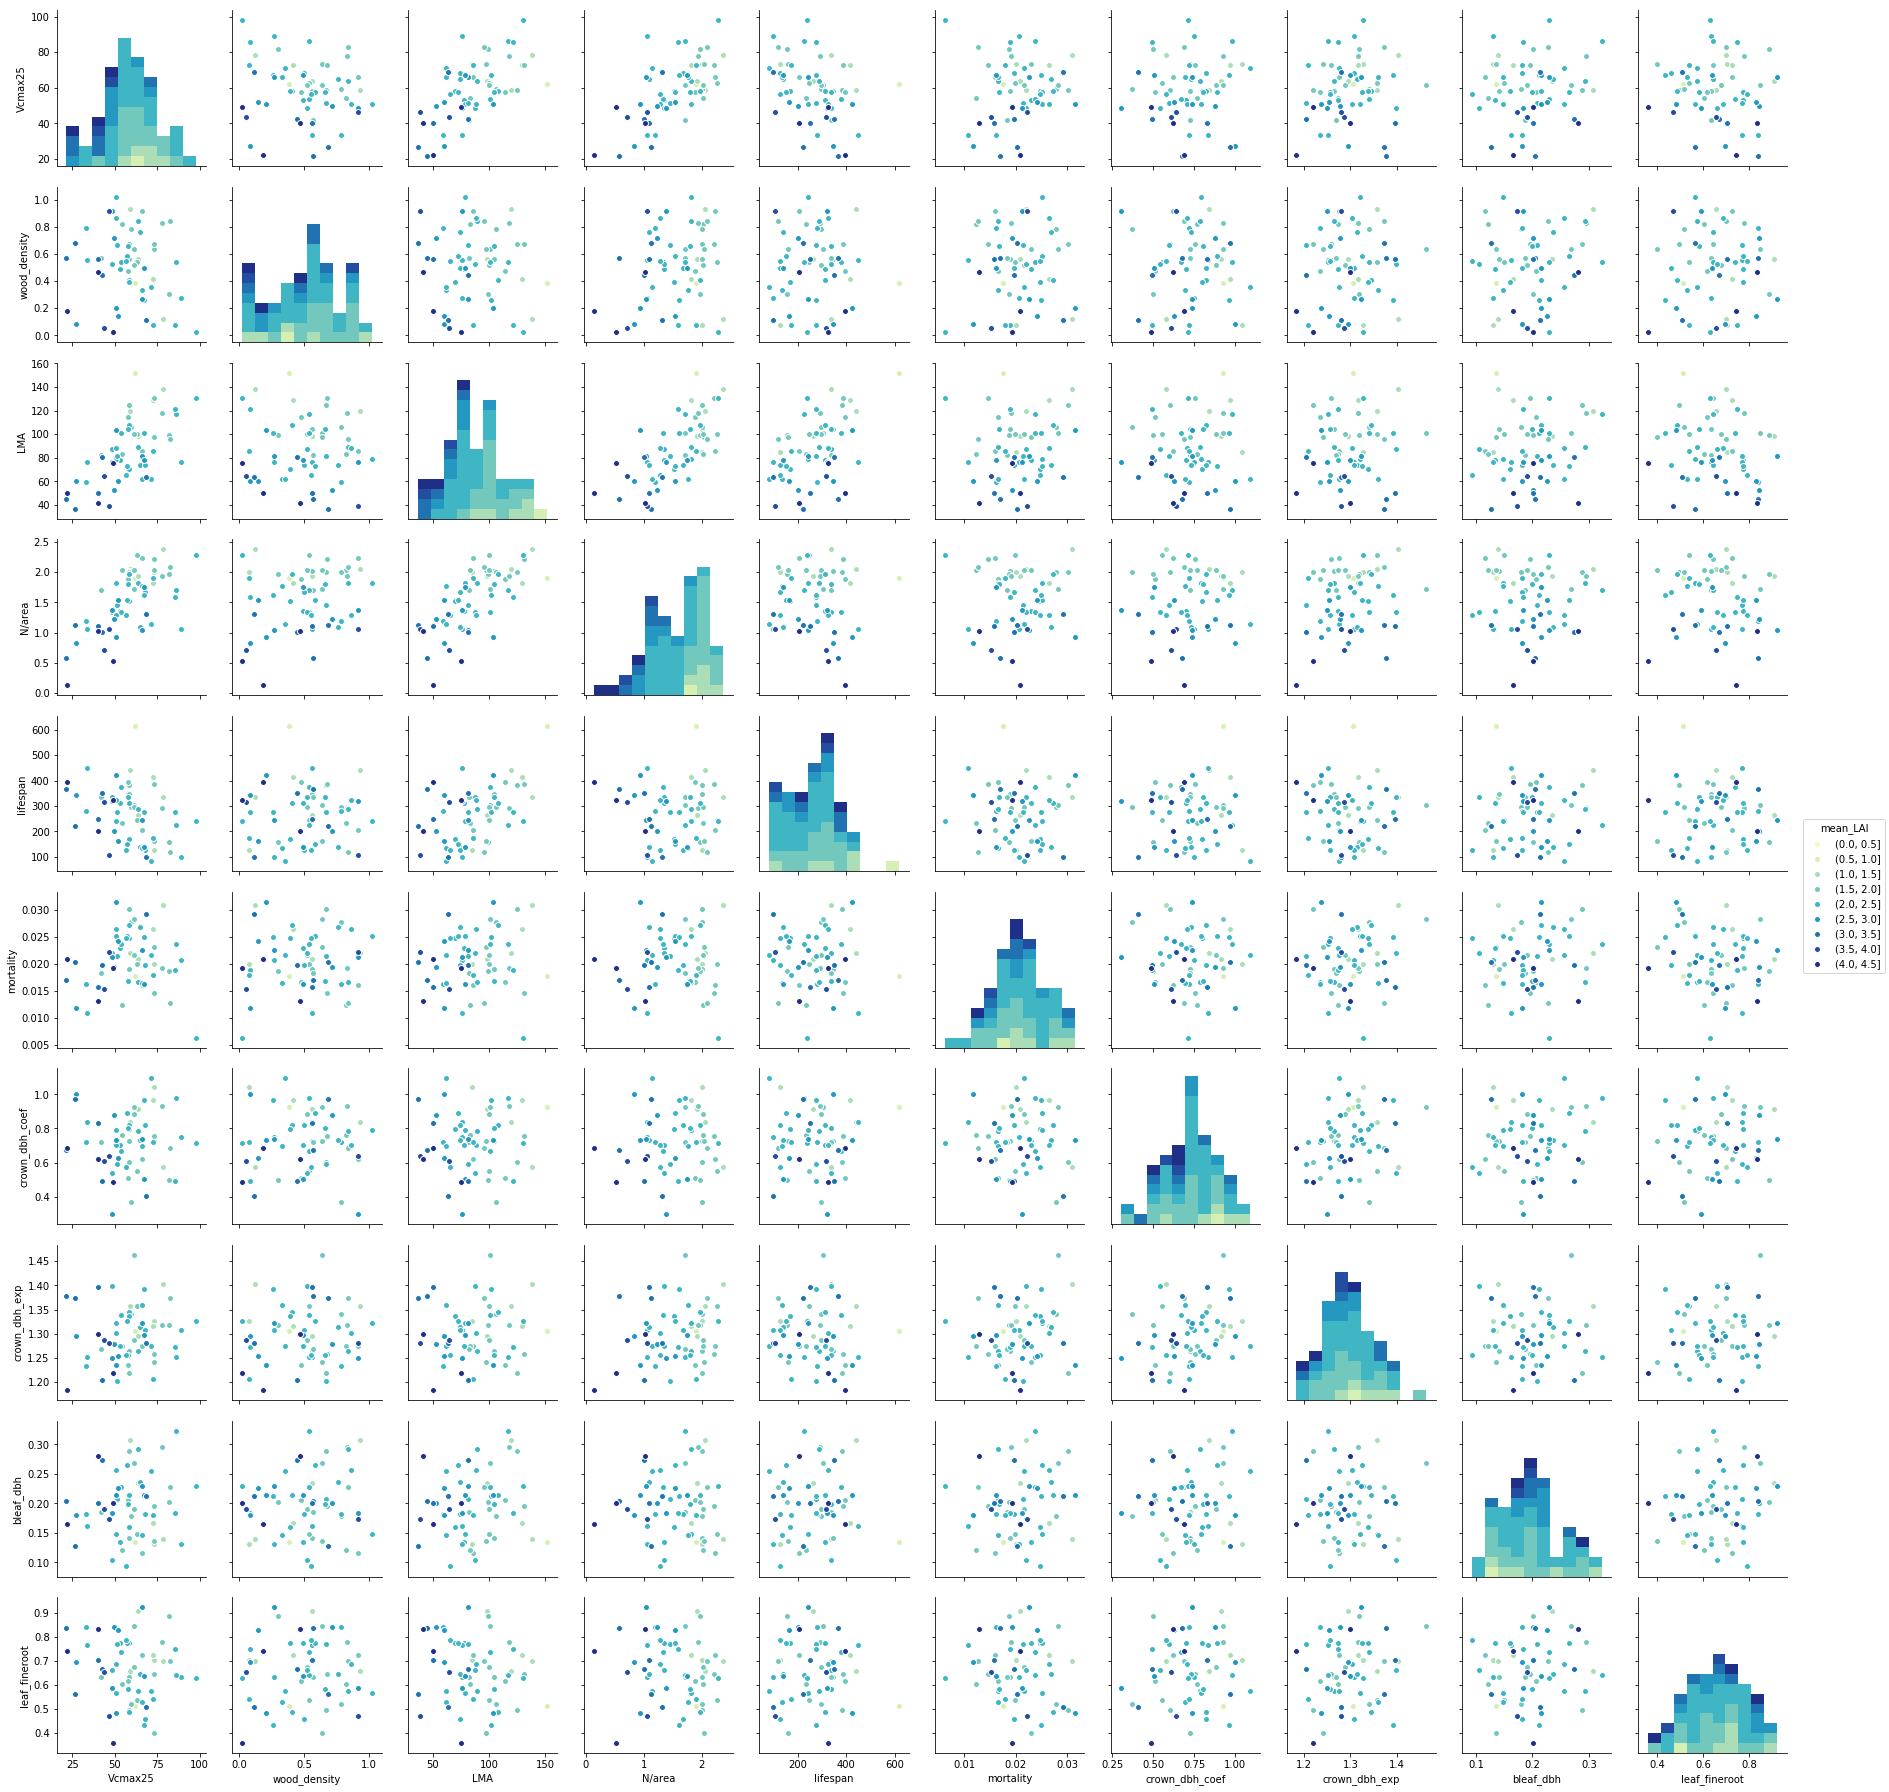

In [2]:
mean_lai = histfile.variables['ELAI'][:,(nyears-10)*12:nyears*12,0].mean(axis=1)


traits_matrix_survived = np.ma.masked_array(traits_matrix, mask=np.repeat(np.logical_not(survived),10))

df_traits_survived = pd.DataFrame(traits_matrix_survived, columns=column_names)

df_traits_survived["mean_LAI"] = pd.cut(mean_lai, bins=np.arange(10)*.5)

g = sns.pairplot(df_traits_survived, hue="mean_LAI",
                 hue_order=df_traits_survived.mean_LAI.cat.categories,
                 palette="YlGnBu")

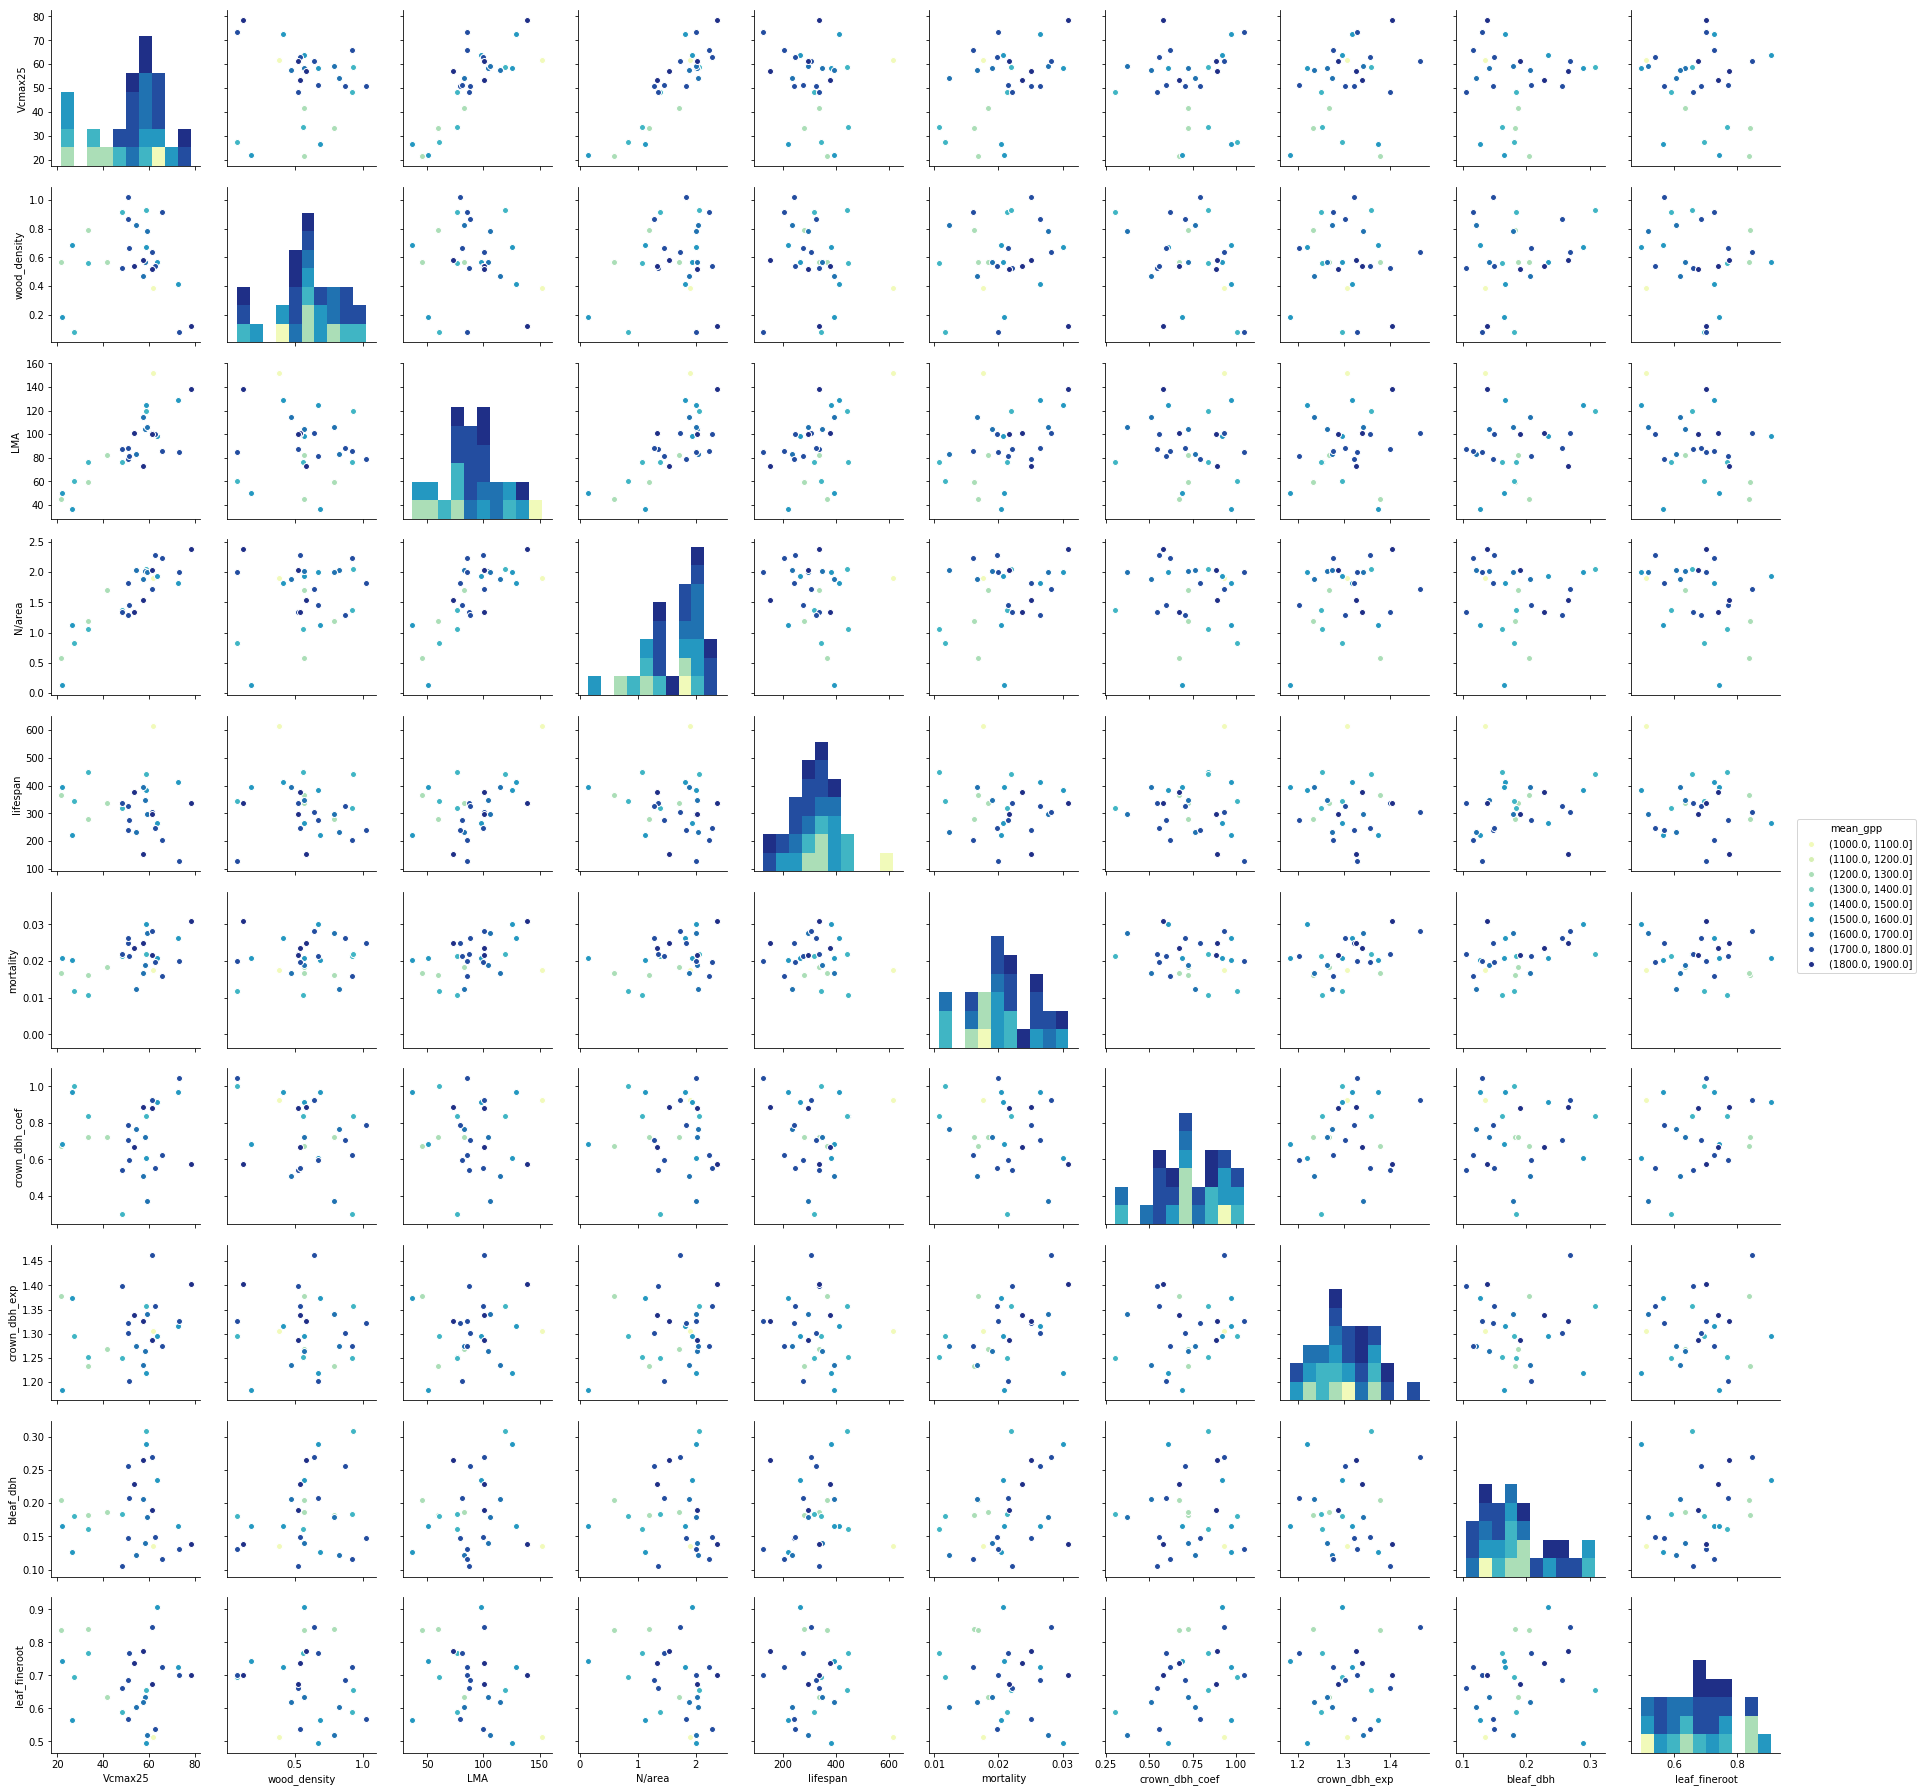

In [3]:
mean_gpp = np.ma.masked_array(histfile.variables['GPP'][:,(nyears-10)*12:nyears*12,0].mean(axis=1) * 86400 *365, mask=np.logical_not(survived))
#print(mean_gpp.mean())
df_traits_survived["mean_gpp"] = pd.cut(mean_gpp, bins=np.arange(10)*100.+1000.)

gpscatterplot = sns.pairplot(df_traits_survived, hue="mean_gpp",
                 hue_order=df_traits_survived.mean_gpp.cat.categories,
                 palette="YlGnBu")